Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the female respondent file.

In [1]:
%matplotlib inline
import nsfg
import chap01soln
resp = chap01soln.ReadFemResp()
preg = nsfg.ReadFemPreg()

/home/pruvolo/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Make a PMF of <tt>numkdhh</tt>, the number of children under 18 in the respondent's household.

In [2]:
import thinkstats2
pmf = thinkstats2.Pmf(resp.numkdhh)

Display the PMF.

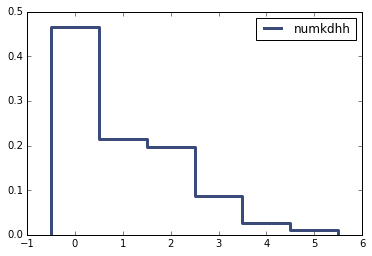

In [3]:
import thinkplot
thinkplot.Pmf(pmf, label='numkdhh')
thinkplot.Show()

Define <tt>BiasPmf</tt>.

In [4]:
def BiasPmf(pmf, label=''):
    """Returns the Pmf with oversampling proportional to value.

    If pmf is the distribution of true values, the result is the
    distribution that would be seen if values are oversampled in
    proportion to their values; for example, if you ask students
    how big their classes are, large classes are oversampled in
    proportion to their size.

    Args:
      pmf: Pmf object.
      label: string label for the new Pmf.

     Returns:
       Pmf object
    """
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

Make a the biased Pmf of children in the household, as observed if you surveyed the children instead of the respondents.

In [5]:
biased = BiasPmf(pmf, label='biased')

Display the actual Pmf and the biased Pmf on the same axes.

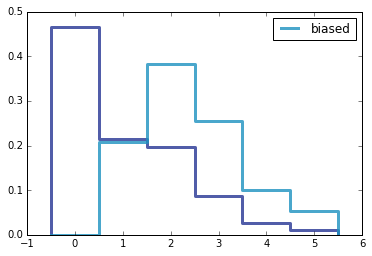

In [6]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased])
thinkplot.Show()

Compute the means of the two Pmfs.

In [7]:
pmf.Mean()

1.0242051550438309

In [8]:
biased.Mean()

2.4036791006642821

### ThinkStats Chapter 3, Exercise 3

I started with the question, “Are first babies more likely to be late?” To address it, I computed the difference in means between groups of babies, but I ignored the possibility that there might be a difference between first babies and others for the same woman.

To address this version of the question, select respondents who have at least two babies and compute pairwise differences. Does this formulation of the question yield a different result?

Hint: use nsfg.MakePregMap.

Mean difference between pairs 0.0859556494192


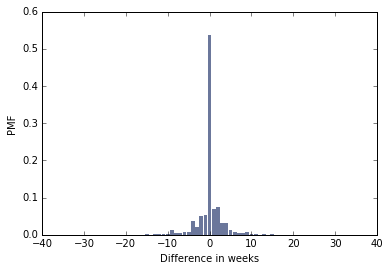

In [10]:
def Diffs(t):
    """List of differences between the first elements and others.

    t: list of numbers
    
    returns: list of numbers
    """
    first = t[0]
    rest = t[1:]
    diffs = [first - x for x in rest]
    return diffs

live = preg[preg.outcome == 1]
# live = live[live.prglngth >= 37]
preg_map = nsfg.MakePregMap(live)

diffs = []
for caseid, indices in preg_map.items():
    lengths = live.loc[indices].prglngth.values
    if len(lengths) >= 2:
        diffs.extend(Diffs(lengths))

mean = thinkstats2.Mean(diffs)
print 'Mean difference between pairs', mean

pmf = thinkstats2.Pmf(diffs)
thinkplot.Hist(pmf, align='center')
thinkplot.Show(xlabel='Difference in weeks', ylabel='PMF')